## LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

import datetime

import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
import datetime
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\migue\Anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## LECTURA DE DATOS

In [3]:
NDAQ = pdr.get_data_yahoo('NDAQ', 
                          start=datetime.datetime(2015, 4, 29), 
                          end=datetime.datetime(2020, 6, 5))
NDAQ = NDAQ[['Close']]
NDAQ.columns = ['NDAQ']
NDAQ = NDAQ.applymap(lambda x: x/1.1285216494845334)
NDAQ

,NDAQ
Date,
2015-04-29,43.384191
2015-04-30,43.091775
2015-05-01,43.463942
2015-05-04,43.969027
2015-05-05,43.800666
2015-05-06,43.393054
2015-05-07,44.208279
2015-05-08,44.793114
2015-05-11,45.023506


In [4]:
nasdaq = pd.read_csv('./data/nasdaq29.csv')
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'], format="%Y-%m-%d")
nasdaq = nasdaq.set_index('Date')
nasdaq = nasdaq.applymap(lambda x: x/1.1285216494845334)
nasdaq

,Nasdaq
Date,
2015-04-29,4451.526475
2015-04-30,4378.670097
2015-05-01,4435.352217
2015-05-04,4445.576212
2015-05-05,4376.811913
2015-05-06,4359.371397
2015-05-07,4382.320891
2015-05-08,4433.719993
2015-05-11,4424.880110


In [5]:
index = pd.concat([nasdaq, NDAQ], axis = 1)
index

,Nasdaq,NDAQ
Date,,
2015-04-29,4451.526475,43.384191
2015-04-30,4378.670097,43.091775
2015-05-01,4435.352217,43.463942
2015-05-04,4445.576212,43.969027
2015-05-05,4376.811913,43.800666
2015-05-06,4359.371397,43.393054
2015-05-07,4382.320891,44.208279
2015-05-08,4433.719993,44.793114
2015-05-11,4424.880110,45.023506


## RISK PREMIA SIZE

La estrategia consiste en coger a las empresas de mayor y menor capitalización bursátil. Apartir de estas nos situamos en una posición larga en aquellas empresas de menor capitalización y, en una posición corta en las de mayor. La estrategia se basa en que las empresas de menor capitalización no son tan seguidas por el mercado y, por tanto, presentan un mayor valor y potencial de alfa.

En nuestro caso utilizaremos los índices _Nasdaq_ y _Nasdaq Small Cap_.

En primer lugar calculamos la rentabilidad obtenida a lo largo del tiempo con ambos índices. Los pondremos en base 100 para posteriormente comparar la evolución de los índices y de la estrategia.

In [6]:
for columna in index.columns:
    
    # rentabilidades
    index['Returns {}'.format(columna)] = index[columna].pct_change()
    
    # base 100
    index['Evolucion {}'.format(columna)] = 100
    
    for i in range(1, len(index)):
        
        # resultado en base 100
        index['Evolucion {}'.format(columna)].iloc[i] = index['Evolucion {}'.format(columna)].iloc[i-1]*(1+index['Returns {}'.format(columna)].iloc[i])

# borro los NaN del primer día
index.dropna(inplace = True)

index.head()

,Nasdaq,NDAQ,Returns Nasdaq,Evolucion Nasdaq,Returns NDAQ,Evolucion NDAQ
Date,,,,,,
2015-04-30,4378.670097,43.091775,-0.016367,98.363339,-0.006740,99.325984
2015-05-01,4435.352217,43.463942,0.012945,99.636658,0.008637,100.183824
2015-05-04,4445.576212,43.969027,0.002305,99.866332,0.011621,101.348039
2015-05-05,4376.811913,43.800666,-0.015468,98.321597,-0.003829,100.959970
2015-05-06,4359.371397,43.393054,-0.003985,97.929810,-0.009306,100.020429


A continuación calculamos los resultados de la estrategia. Adoptaremos una pocisión larga en las empresas de menor capitalización, MSCI Small, y una corta en las de mayor, MSCI.

In [7]:
index['Estrategia'] = 100

for i in range(1, len(index)):
    
    # en el small adoptamos posicion larga por lo que el signo es positivo, el el msci adoptamos
    # posicion corta, por lo que el signo es negativo
    index.Estrategia.iloc[i] = index.Estrategia.iloc[i-1] * (1 + index['Returns NDAQ'].iloc[i] - 
                                                            index['Returns Nasdaq'].iloc[i])

In [8]:
index

,Nasdaq,NDAQ,Returns Nasdaq,Evolucion Nasdaq,Returns NDAQ,Evolucion NDAQ,Estrategia
Date,,,,,,,
2015-04-30,4378.670097,43.091775,-1.636661e-02,98.363339,-0.006740,99.325984,100.000000
2015-05-01,4435.352217,43.463942,1.294505e-02,99.636658,0.008637,100.183824,99.569155
2015-05-04,4445.576212,43.969027,2.305115e-03,99.866332,0.011621,101.348039,100.496709
2015-05-05,4376.811913,43.800666,-1.546803e-02,98.321597,-0.003829,100.959970,101.666386
2015-05-06,4359.371397,43.393054,-3.984753e-03,97.929810,-0.009306,100.020429,101.125387
2015-05-07,4382.320891,44.208279,5.264404e-03,98.445352,0.018787,101.899510,102.492862
2015-05-08,4433.719993,44.793114,1.172874e-02,99.599992,0.013229,103.247549,102.646638
2015-05-11,4424.880110,45.023506,-1.993785e-03,99.401411,0.005143,103.778600,103.379253
2015-05-12,4409.475886,44.748809,-3.481275e-03,99.055367,-0.006101,103.145427,103.108408


## COMPARACION

Ahora queremos observar los resultados de nuestra estrategia y su evolución. Para ponerla en contexto la compararemos con cada uno de los índices.

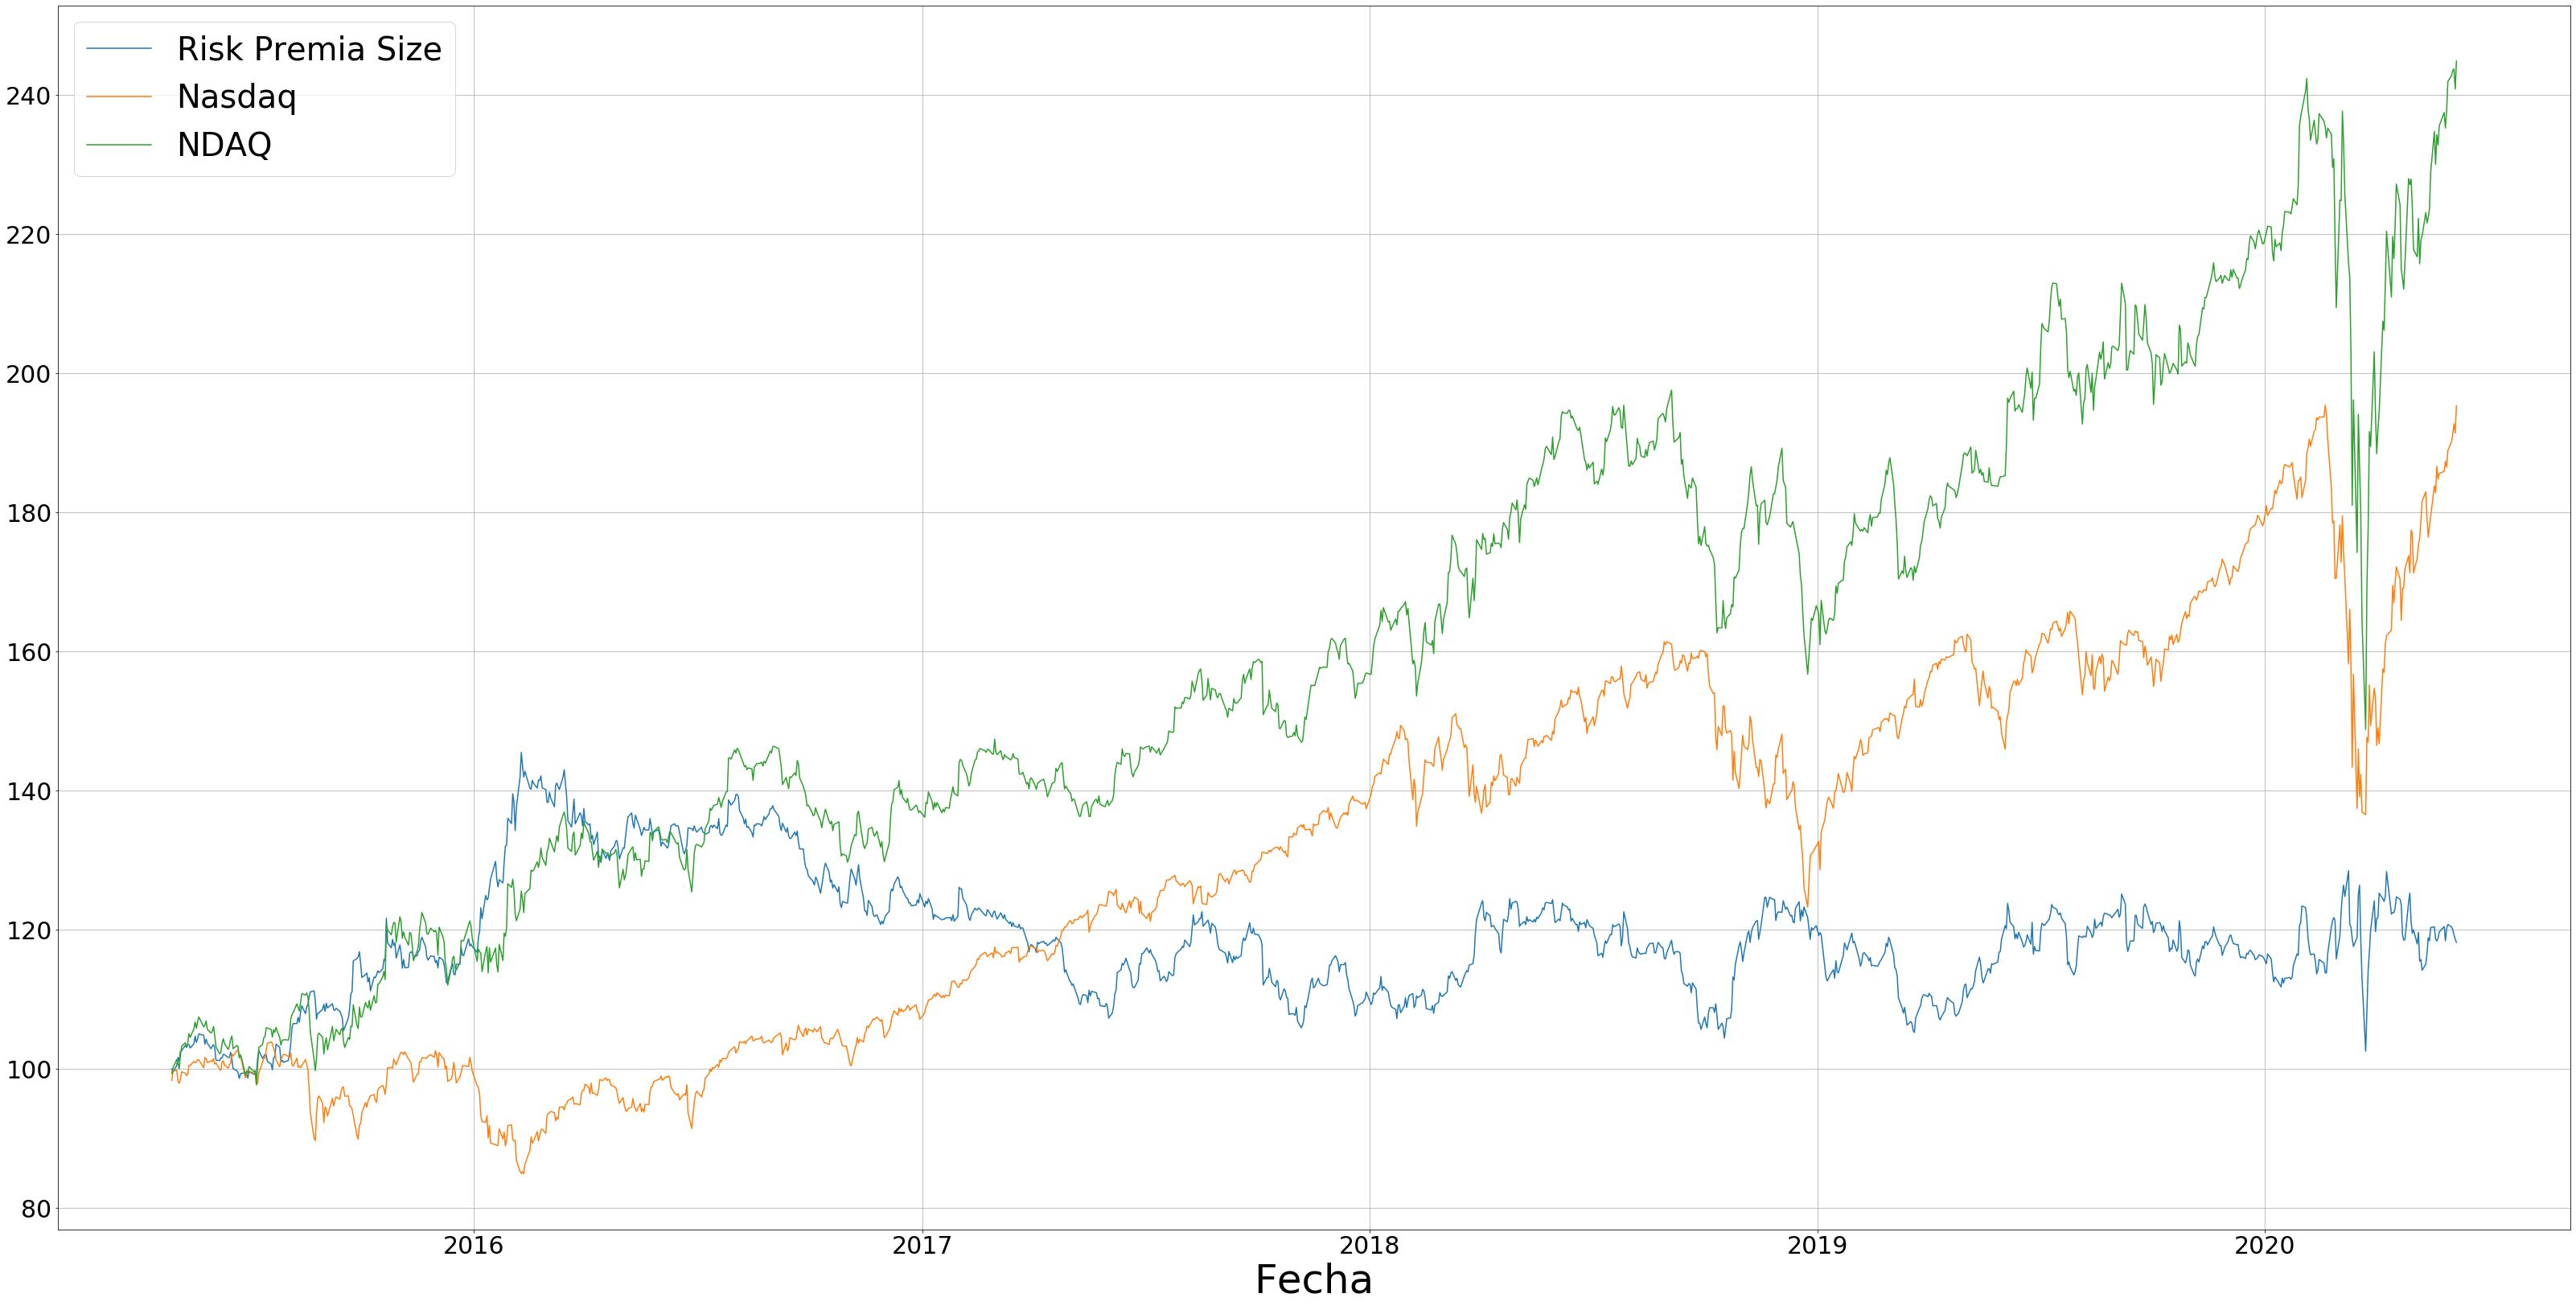

In [9]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(index["Estrategia"])
ax1 = plt.plot(index["Evolucion Nasdaq"])
ax1 = plt.plot(index["Evolucion NDAQ"])
ax1 = plt.xlabel("Fecha", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Risk Premia Size", "Nasdaq", "NDAQ"],
                 prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

## TO CSV

Guardamos los resultados de la estrategia en formato csv para posteriormente utilizarlos en la construcción de una cartera.

In [10]:
risk_size_nasdaq = pd.DataFrame({'Size_Nasdaq': index['Estrategia']})
risk_size_nasdaq

,Size_Nasdaq
Date,
2015-04-30,100.000000
2015-05-01,99.569155
2015-05-04,100.496709
2015-05-05,101.666386
2015-05-06,101.125387
2015-05-07,102.492862
2015-05-08,102.646638
2015-05-11,103.379253
2015-05-12,103.108408


In [11]:
risk_size_nasdaq.to_csv('./data_resultante/risk_size_nasdaq.csv')

## CONCLUSIONES

Parece ser que la estrategia durante la segunda mitad del 2015 y prácticamene todo el 2016 tiene resultados positivos en comparación con la evolución de los 2 índices. Pero durante el resto del periodo estudiado su evolución ofrece resultados inferiores a los de los índices _MSCI_ y _MSCI Small Cap_.

Como conclusión final, parece ser que la estrategia atenua los resultados. Por lo que en periodos alcistas ofrece rentabilidades positivas pero inferiores a las del mercado y, en periodos en que el mercado cae, los resultados no son tan negativos.